## Sales Analysis

In [1]:
import pandas as pd
import os

#### unir los datos de ventas de 12 meses en un solo archivo CSV

In [2]:
#df = pd.read_csv('./SalesData/Sales_January_2019.csv')

# obtener nombres de los archivos
files=[file for file in os.listdir('./SalesData')]

df_sales = pd.DataFrame()
#concatenar los dataframes
for i in files:
    df=pd.read_csv('./SalesData/'+i)
    df_sales=pd.concat([df_sales,df])
    
df_sales.to_csv('all_months.csv',index=False)    

In [3]:
#### leer los datos concatenados
all_data = pd.read_csv('all_months.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### limpiar los datos

#### verificar la cantidad de nulos

In [5]:
all_data.isnull().sum().sort_values(ascending = False)

Purchase Address    545
Order Date          545
Price Each          545
Quantity Ordered    545
Product             545
Order ID            545
dtype: int64

In [6]:
for col in all_data:
    print(col,': ',all_data[col].isna().sum())

Order ID :  545
Product :  545
Quantity Ordered :  545
Price Each :  545
Order Date :  545
Purchase Address :  545


In [7]:
all_data.shape[0] - all_data.dropna().shape[0]

545

#### eliminar filas con valores NAN

In [4]:
nan_df=all_data[all_data.isna().any(axis=1)]
nan_df.head()

all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Buscar y eliminar 'Or'

In [5]:
or_df=all_data[all_data['Order Date'].str[0:2]=='Or']
or_df.count()#355
or_df.head()
# ya que no podemos saber a que mes pertenecen esos pedidos, no los tomaremos en cuenta

all_data=all_data[all_data['Order Date'].str[0:2]!='Or']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [10]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


#### convertir columna numerica a su tipo correcto

In [93]:
all_data['Quantity Ordered']=all_data['Quantity Ordered'].astype('float32')
all_data['Price Each']=all_data['Price Each'].astype('float32')
## formato de resultados: 23.900000

In [6]:
all_data['Quantity Ordered']=pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each']=pd.to_numeric(all_data['Price Each'])
## formato de resultados: 23.90

### aumentar datos con columnas adicionales

#### agregar columna Mes

In [7]:
all_data['Month']=all_data['Order Date'].str[0:2]
all_data['Month']=all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### agregar columna ventas

In [8]:
all_data['Sales']=all_data['Quantity Ordered']*all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### agregar columna Ciudad

In [9]:
def getCity(address):
    return address.split(',')[1]

def getState(address):
    return address.split(',')[2].split(' ')[1]

all_data['City']=all_data['Purchase Address'].apply(lambda x: f'{getCity(x)} ({getState(x)})')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


### Pregunta 1: ¿Cuál fue el mejor mes para las ventas? cuánto se ganó ese mes?

In [10]:
import matplotlib.pyplot as plt

In [13]:
result1 = all_data.groupby('Month').sum()
result1

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


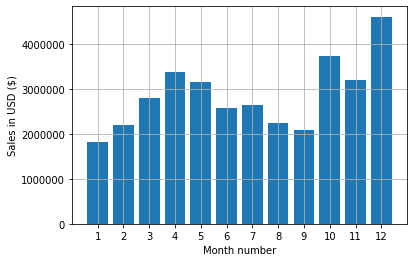

In [14]:
months=range(1,13)
plt.bar(months,result1['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.grid()
plt.show()

### Pregunta 2: Cual es la ciudad que ha tenido el mayor numero de ventas

In [15]:
result2 = all_data.groupby('City').sum()
result2

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Portland (ME),2750,4.471893e+05,17144,4.497583e+05
Portland (OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06


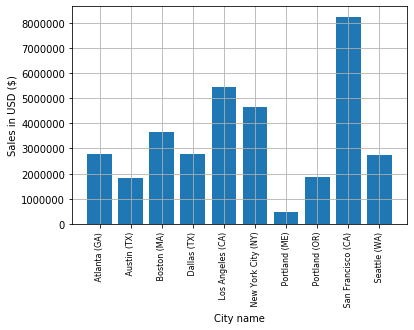

In [16]:
#cities=all_data['City'].unique()

#para que el orden de las ciudades esten en relacion a las ventas:
cities=[city for city, df in all_data.groupby('City')]

plt.bar(cities,result2['Sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City name')
plt.grid()
plt.show()

### Pregunta 3: ¿A qué hora debemos mostrar anuncios para maximizar la probabilidad de que los clientes compren un producto?

In [17]:
#convertimos el tipo de fecha para que sea mas manejable
all_data['Order Date']=pd.to_datetime(all_data['Order Date'])

In [18]:
#extraemos la hora y el minuto
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [19]:
#result3 = all_data.groupby('Hour').sum().sort_values(by='Sales', ascending=False)
result3 = all_data.groupby('Hour').sum()
result3

,Quantity Ordered,Price Each,Month,Sales,Minute
Hour,,,,,
0,4428,709296.70,27554,713721.27,103596
1,2619,458490.00,16657,460866.88,61807
2,1398,233833.64,8507,234851.44,32508
3,928,144726.42,5904,145757.89,23044
4,937,162058.18,6148,162661.01,26876
5,1493,229621.21,9301,230679.82,42877
6,2810,445000.11,17539,448113.00,80343
7,4556,740568.11,28850,744854.12,127447
8,7002,1185970.62,43626,1192348.97,198135


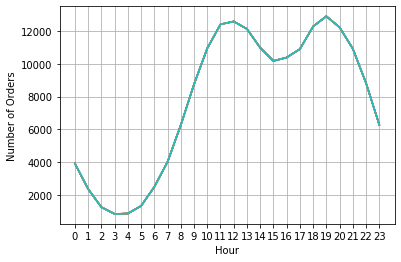

In [20]:
#cuentas ordenes de compra se hizo por hora?
hours=[h for h, df in all_data.groupby('Hour')]
plt.plot(hours,all_data.groupby('Hour').count())
plt.xticks(hours)
plt.ylabel('Number of Orders')
plt.xlabel('Hour')
plt.grid()
plt.show()

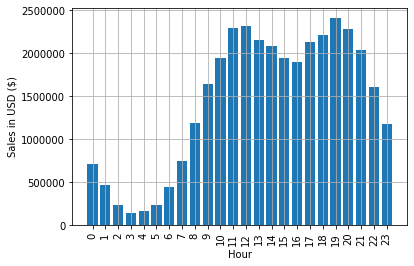

In [21]:
# cuanto se hzio en ventas por hora?

hours=[h for h, df in all_data.groupby('Hour')]

plt.bar(hours,result3['Sales'])
plt.xticks(hours, rotation='vertical', size=10)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Hour')
plt.grid()
plt.show()

### Pregunta 4: Que productos se venden con mas frecuencia juntos?

In [48]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [22]:
#verificamos los Order ID duplicados (TRUE)
dup_df = all_data[all_data['Order ID'].duplicated(keep=False)]
dup_df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,42
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,42
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31
31,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31
32,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco (CA),17,0
33,176586,Google Phone,1,600.00,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,600.00,San Francisco (CA),17,0
119,176672,Lightning Charging Cable,1,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,14.95,New York City (NY),11,7
120,176672,USB-C Charging Cable,1,11.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,11.95,New York City (NY),11,7


In [23]:
# Unir los productos en una nueva columna pero agrupados por Order ID
dup_df['Group Product'] = dup_df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))
dup_df.head()

C:\Users\51938\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Group Product
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,42,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [24]:
#luego de unir los productos, eliminar las filas que se repiten
dup_df = dup_df[['Order ID','Group Product']].drop_duplicates()
dup_df.head()

,Order ID,Group Product
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [52]:
dup_df.head(20)

,Order ID,Group Product
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
129,176681,"Apple Airpods Headphones,ThinkPad Laptop"
138,176689,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
189,176739,"34in Ultrawide Monitor,Google Phone"
225,176774,"Lightning Charging Cable,USB-C Charging Cable"
233,176781,"iPhone,Lightning Charging Cable"


In [57]:
#agrupar y contar las repeticiones

from itertools import combinations
from collections import Counter

list2 = dup_df['Group Product'][10:15]

count = Counter(combinations(list2, 2))

count

Counter({('Google Phone,Bose SoundSport Headphones,Wired Headphones',
          'Google Phone,USB-C Charging Cable'): 1,
         ('Google Phone,Bose SoundSport Headphones,Wired Headphones',
          'Google Phone,Wired Headphones'): 2,
         ('Google Phone,Bose SoundSport Headphones,Wired Headphones',
          'AAA Batteries (4-pack),27in FHD Monitor'): 1,
         ('Google Phone,USB-C Charging Cable',
          'Google Phone,Wired Headphones'): 2,
         ('Google Phone,USB-C Charging Cable',
          'AAA Batteries (4-pack),27in FHD Monitor'): 1,
         ('Google Phone,Wired Headphones', 'Google Phone,Wired Headphones'): 1,
         ('Google Phone,Wired Headphones',
          'AAA Batteries (4-pack),27in FHD Monitor'): 2})

In [55]:
#ejemplo de uso de Counter
from itertools import combinations
from collections import Counter

list2 = [2, 3, 4, 2, 2]

count = Counter(combinations(list2, 2))#esta forma sirve para listas

print(count)

Counter({(2, 2): 3, (3, 2): 2, (4, 2): 2, (2, 3): 1, (2, 4): 1, (3, 4): 1})


In [62]:
#ejemplo de uso de Counter con actualizacion de conteo a pariir de matrices
from itertools import combinations
from collections import Counter

list3 = [[2, 3], [2, 3, 4]]

count = Counter()#cuenta las apariciones de la palabra en una lista

for lista in list3:
    count.update(Counter(combinations(lista, 2)))

count

Counter({(2, 3): 2, (2, 4): 1, (3, 4): 1})

In [64]:
#contar los pares de las combinaciones de Group Product

#Counter es una colección donde los elementos se almacenan como claves de diccionario y sus recuentos se almacenan como valores de diccionario.
from itertools import combinations
from collections import Counter

count = Counter()

for row in dup_df['Group Product']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
#mostrar los Group Product mas comunes    
#count.most_common(10)
for key, values in count.most_common(10):
    print(key,values)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Pregunta 5: ¿Qué productos se venden más? ¿Por qué crees que se vendió más?

In [65]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [70]:
#agrupacion de nombre
group_products = all_data.groupby('Product')
quantity_ordered = all_data.groupby('Product').sum()['Quantity Ordered']

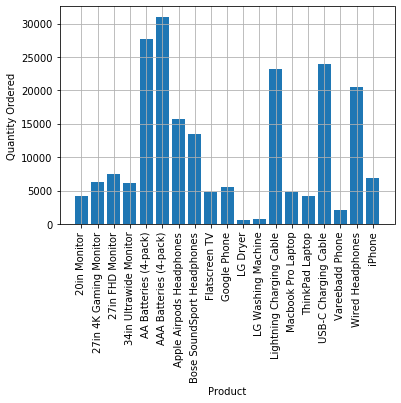

In [75]:
products=[prod for prod, df in group_products]

plt.bar(products,quantity_ordered)
plt.xticks(products, rotation='vertical', size=10)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.grid()
plt.show()

In [79]:
# promedio de precio de los productos
prices = all_data.groupby('Product').mean()['Price Each'].sort_values(ascending=False)
prices
# casualmente los productos que mas se venden son los que tienen los precios mas bajos

Product
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
iPhone                         700.00
LG Dryer                       600.00
LG Washing Machine             600.00
Google Phone                   600.00
Vareebadd Phone                400.00
27in 4K Gaming Monitor         389.99
34in Ultrawide Monitor         379.99
Flatscreen TV                  300.00
Apple Airpods Headphones       150.00
27in FHD Monitor               149.99
20in Monitor                   109.99
Bose SoundSport Headphones      99.99
Lightning Charging Cable        14.95
Wired Headphones                11.99
USB-C Charging Cable            11.95
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Name: Price Each, dtype: float64

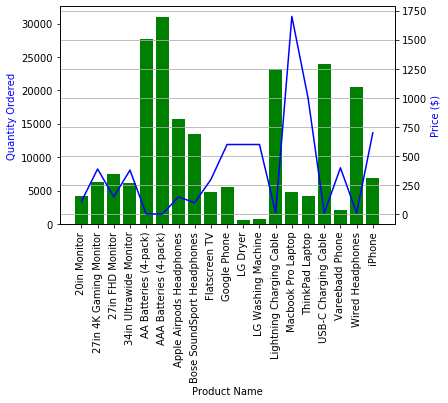

In [93]:
# grafico con doble eje y (cantidad y precios)
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2=ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='b')
ax2.set_ylabel('Price ($)', color='b')

ax1.set_xticklabels(products, rotation='vertical', size=10)

plt.grid()

plt.show()

In [ ]:
# podemos obervar que cuando las ordenes pedidas son mayores, el precio es menor